In [1]:
pip install -q git+https://github.com/huggingface/transformers.git


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install timm


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


the count of people in this image is 11


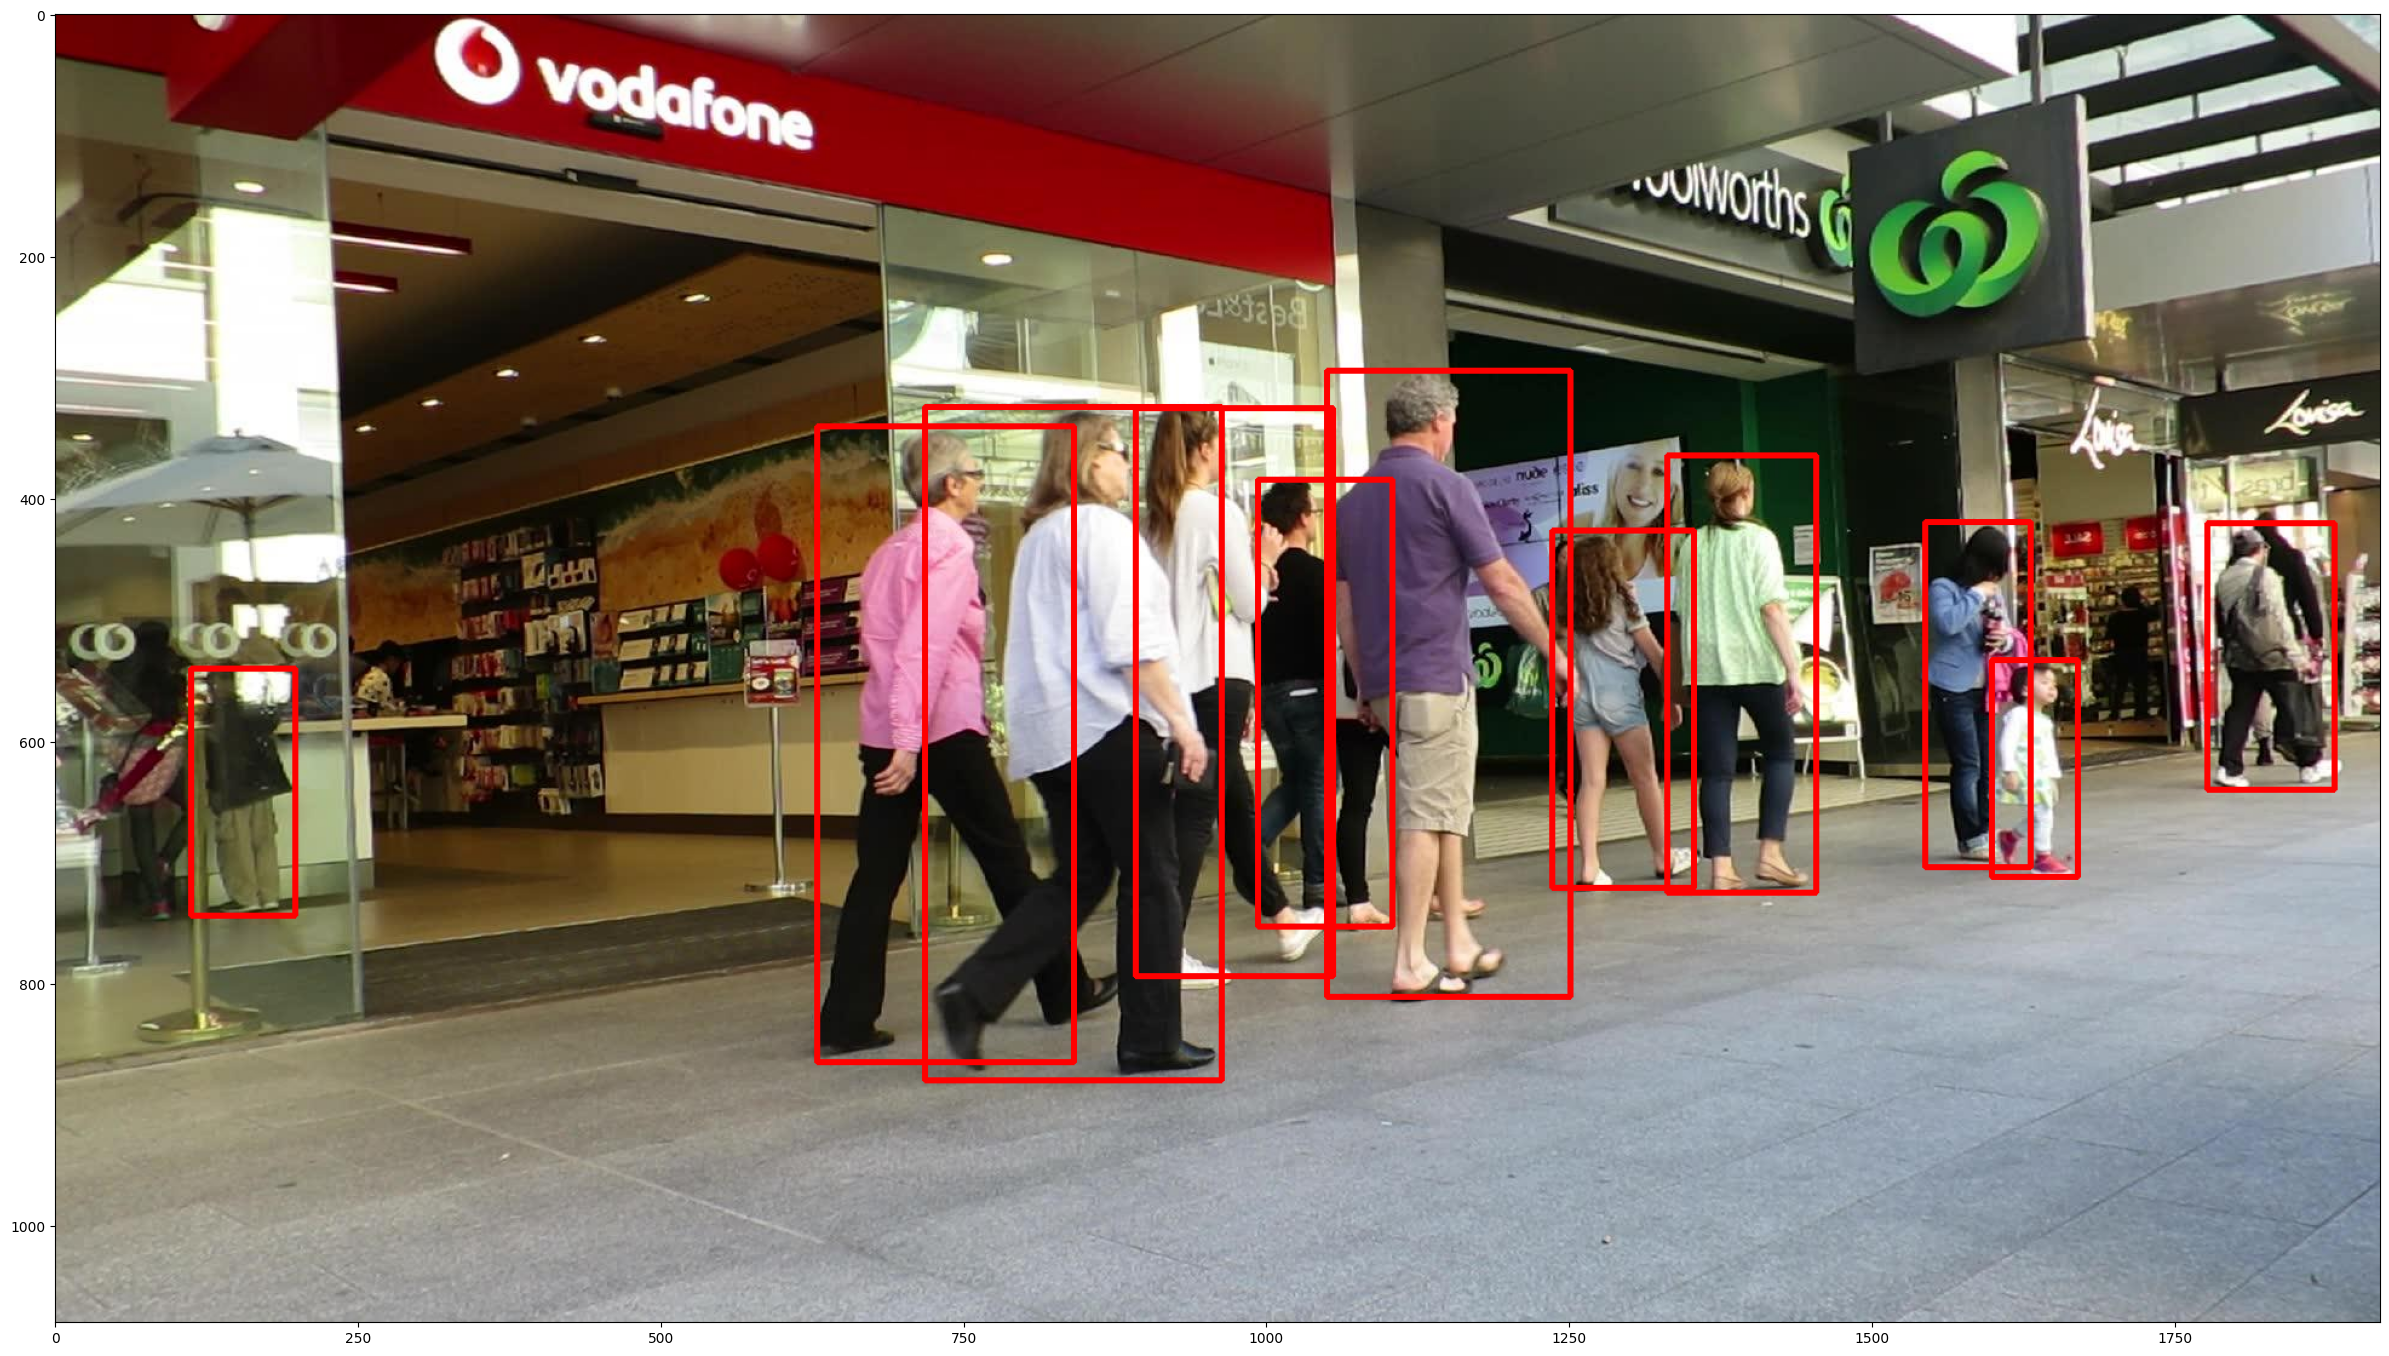

In [22]:
from transformers import DetrFeatureExtractor, DetrForObjectDetection
import torch
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os

gt_dir = './STEP/labels/'

image = Image.open(os.path.join(gt_dir, 'train/0009/000250.jpg'))
img = cv2.imread(os.path.join(gt_dir, 'train/0009/000250.jpg'))
img_copy = img.copy()

feature_extractor = DetrFeatureExtractor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
target_sizes = torch.tensor([image.size[::-1]])
results = feature_extractor.post_process(outputs, target_sizes=target_sizes)[0]

count = 0
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i) for i in box.tolist()]
    if score > 0.9 and model.config.id2label[label.item()] == 'person':
        cv2.rectangle(img_copy, (box[0], box[1]), (box[2], box[3]), (0,0,255),3)
        count = count + 1
plt.rcParams['figure.figsize'] = [30, 30]
print('the count of people in this image is ' + str(count))
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.show()
